In [1]:
import matplotlib as mpl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


Load data

In [5]:
daily_data = pd.read_csv("/media/binhnguyenduc/ubuntu_sofware/vscode/Time_Series_Forecasting/HCM-forecast/data_precipitation_HCMC.csv")
daily_data.head(20)

,Timestamp,Temperature,Sunshine_Duration,Precipitation,CAPE,MSLP,Wind_Speed
0,2017-01-01,-2.005171,495.983845,0.0,0.000000,1024.850000,5.347793
1,2017-01-02,-0.648505,135.298321,1.6,0.666667,1024.937500,4.559078
2,2017-01-03,-1.862255,144.031148,0.0,1.750000,1029.254167,3.285845
3,2017-01-04,0.025662,16.553367,3.9,18.708333,1023.445833,12.328243
4,2017-01-05,-0.131005,236.872048,1.1,10.333333,1029.266667,7.850705
5,2017-01-06,-6.072255,439.863973,0.0,0.333333,1039.387500,5.929043
6,2017-01-07,-6.521421,39.572393,0.5,10.583333,1036.650000,3.903254
7,2017-01-08,-0.477255,85.279453,2.0,8.500000,1032.637500,2.566252
8,2017-01-09,0.522329,94.783164,0.0,2.041667,1028.362500,4.312961
9,2017-01-10,0.341912,13.606060,7.7,1.833333,1013.908333,6.294597


In [6]:
daily_data.set_index('Timestamp', inplace=True)

In [7]:
daily_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2520 entries, 2017-01-01 to 2023-11-25
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Temperature        2520 non-null   float64
 1   Sunshine_Duration  2520 non-null   float64
 2   Precipitation      2520 non-null   float64
 3   CAPE               2520 non-null   float64
 4   MSLP               2520 non-null   float64
 5   Wind_Speed         2520 non-null   float64
dtypes: float64(6)
memory usage: 137.8+ KB


In [8]:
daily_data.describe()

,Temperature,Sunshine_Duration,Precipitation,CAPE,MSLP,Wind_Speed
count,2520.000000,2520.000000,2520.000000,2520.000000,2520.000000,2520.000000
mean,12.222619,397.975441,2.302778,50.404861,1017.757943,7.396612
std,7.526962,256.470300,4.155883,153.862199,7.967884,3.710249
min,-7.190588,0.000000,0.000000,0.000000,982.775000,1.962300
25%,6.266391,174.529499,0.000000,0.750000,1013.511458,4.814451
50%,11.910454,383.904619,0.200000,6.187500,1017.806250,6.309248
75%,18.614308,609.435169,3.000000,24.229167,1022.285417,8.906816
max,29.663996,963.699999,39.300000,2172.333333,1042.983333,30.123987


Overview 

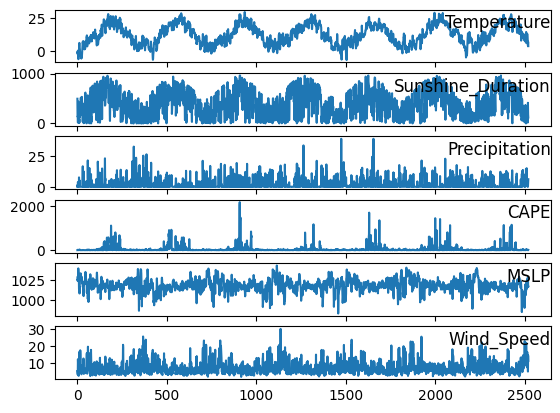

In [9]:
values = daily_data.values
groups = [0, 1, 2, 3, 4, 5]
i=1
for group in groups:
    plt.subplot(len(groups), 1, i)
    plt.plot(values[:, group])
    plt.title(daily_data.columns[group], y=0.5, loc='right')
    i += 1


plt.show()

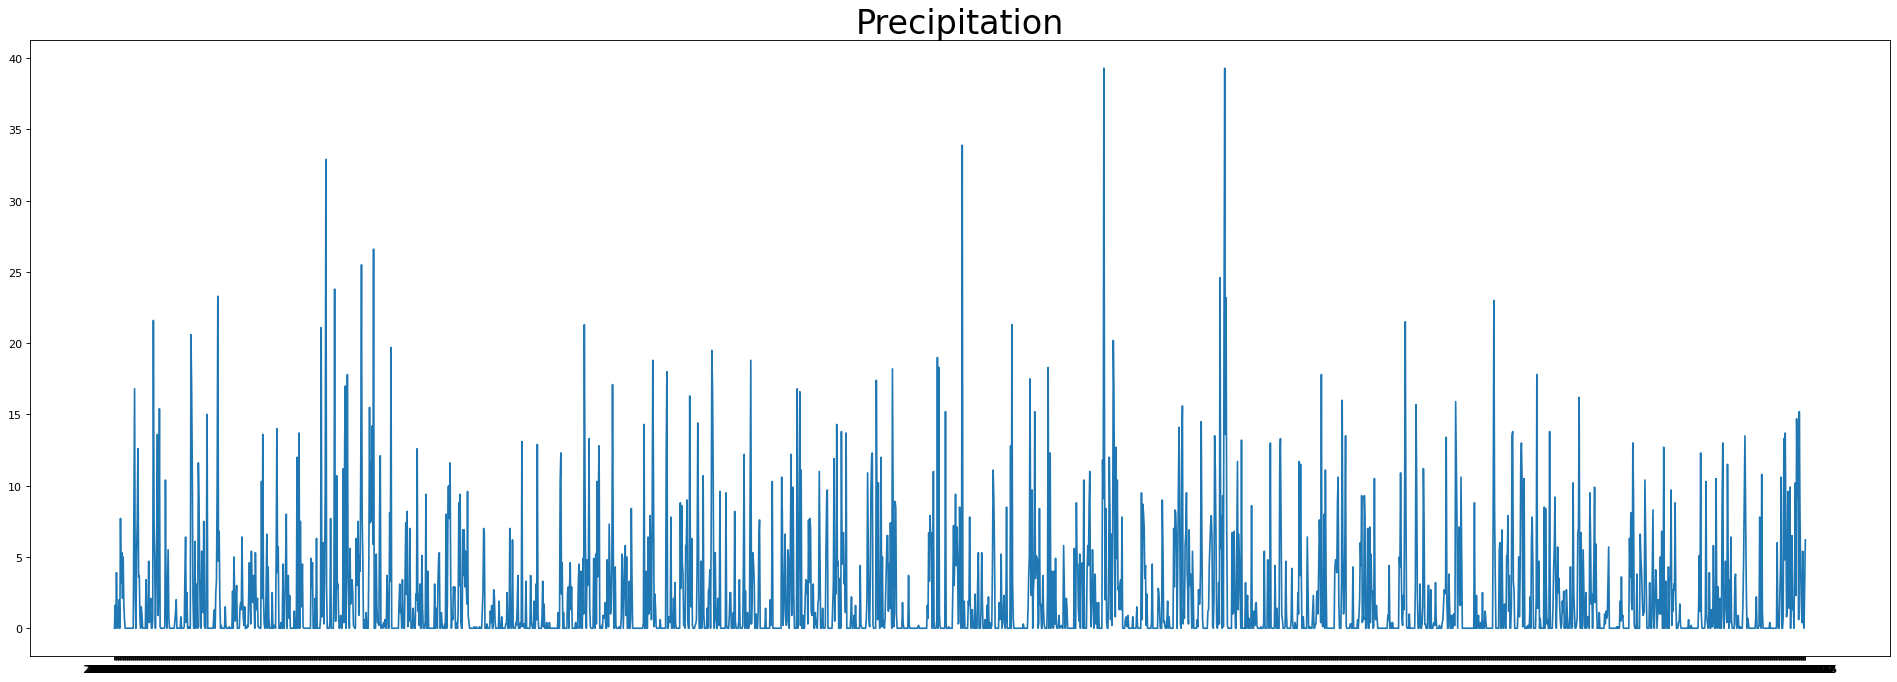

In [10]:
plt.figure(num=None, figsize=(30, 10), dpi=80, facecolor='w', edgecolor='k')
plt.title('Precipitation', fontsize=30)

plt.plot(daily_data["Precipitation"])

Decomposing time series

In [11]:
import statsmodels as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa import api as smt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from pylab import rcParams

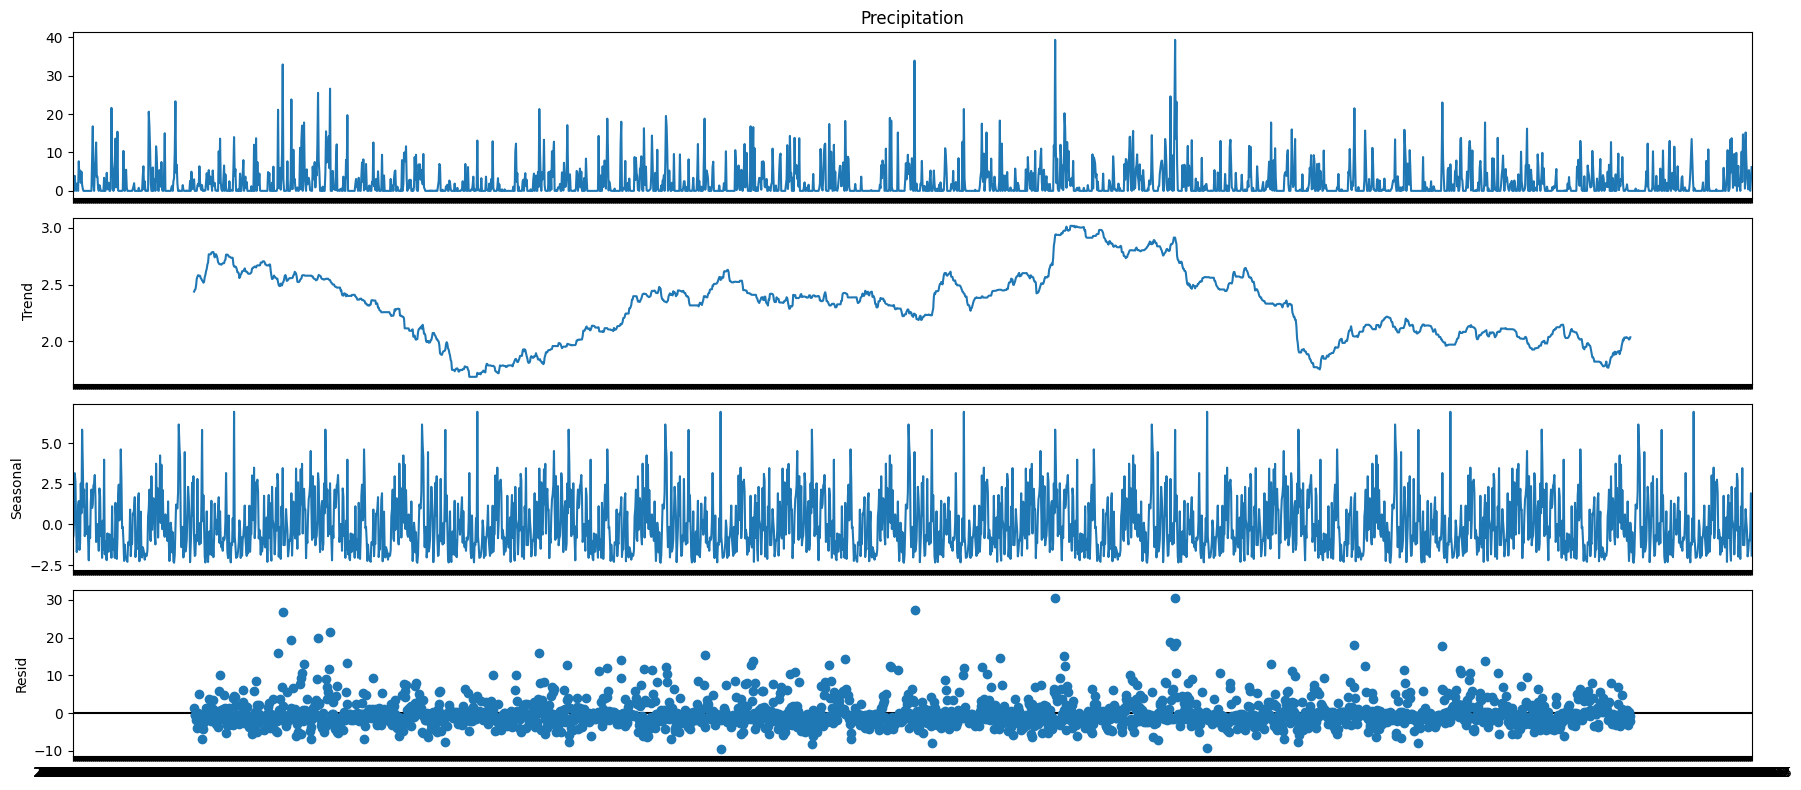

<Figure size 4000x1600 with 0 Axes>

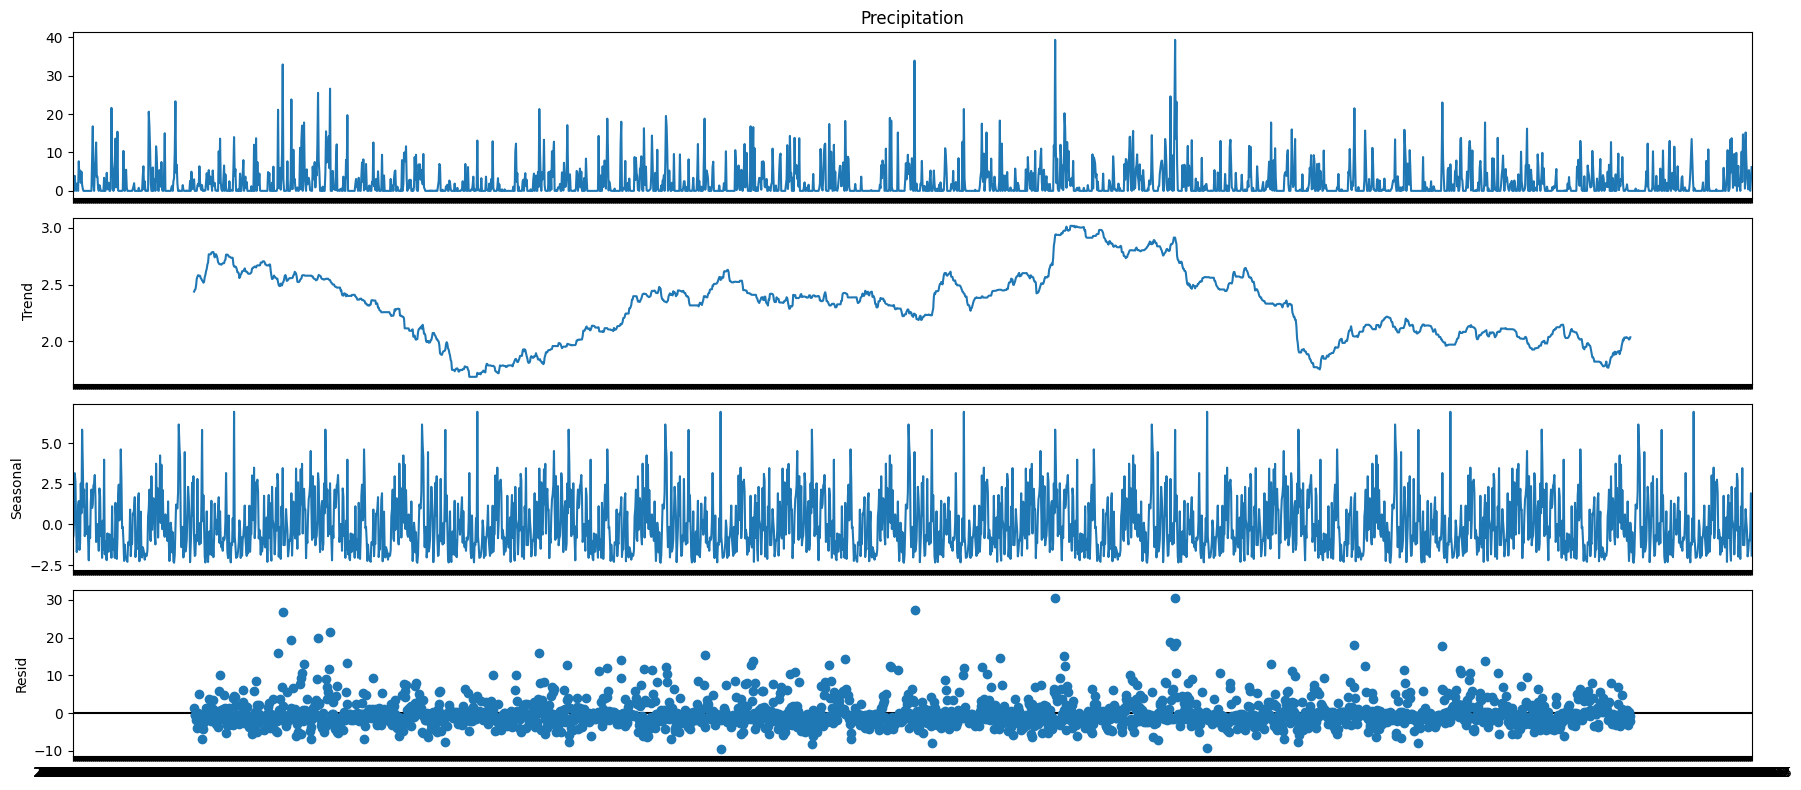

In [27]:
rcParams['figure.figsize'] = 18, 8
plt.figure(num=None, figsize=(50, 20), dpi=80, facecolor='w', edgecolor='k')
series = daily_data["Precipitation"]
result = seasonal_decompose(series, model='additive', period=365)
result.plot()

In [18]:
pd.infer_freq(daily_data.index)

'D'

check trend in data

In [30]:
from sklearn.linear_model import LinearRegression


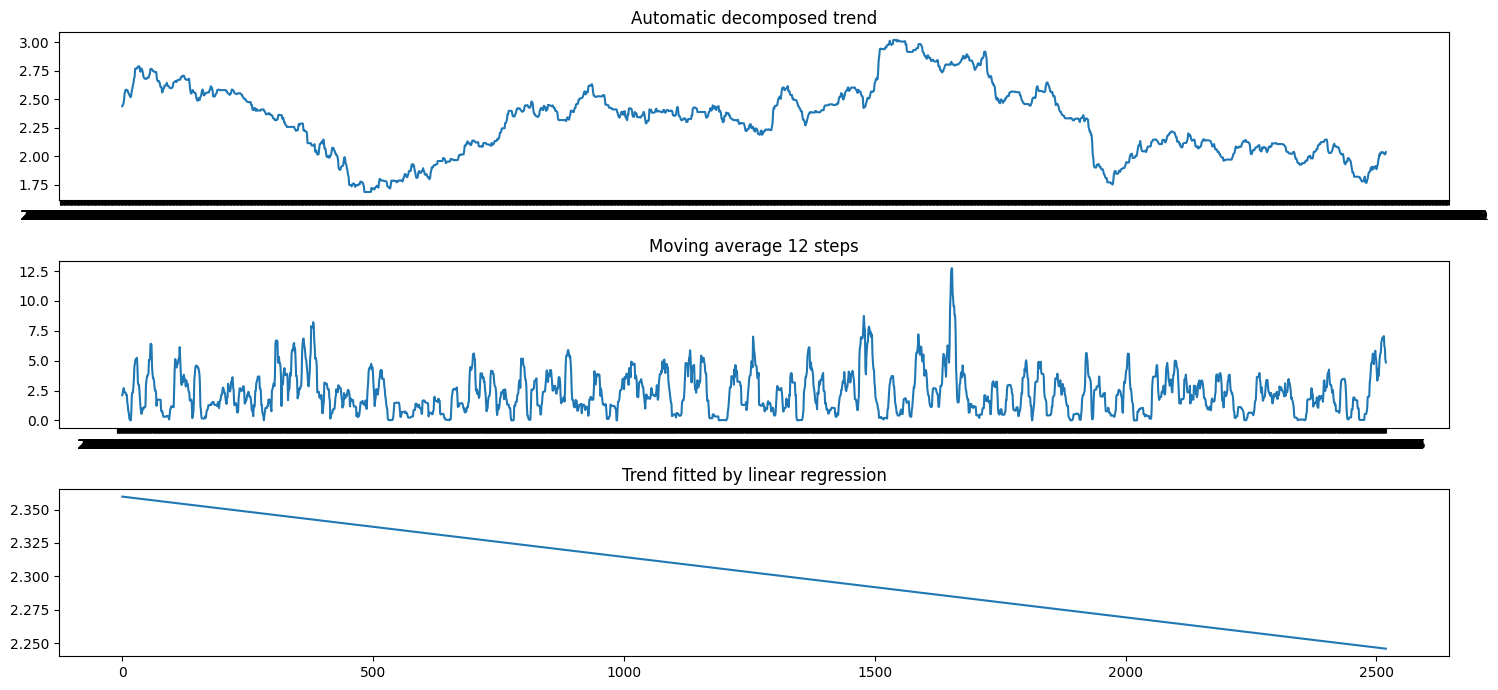

In [31]:
fig = plt.figure(figsize=(15, 7))
layout = (3, 2)
pm_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
mv_ax = plt.subplot2grid(layout, (1, 0), colspan=2)
fit_ax = plt.subplot2grid(layout, (2, 0), colspan=2)

pm_ax.plot(result.trend)
pm_ax.set_title("Automatic decomposed trend")

mm = daily_data.Precipitation.rolling(12).mean()
mv_ax.plot(mm)
mv_ax.set_title("Moving average 12 steps")


X = [i for i in range(0, len(daily_data.Precipitation))]
X = np.reshape(X, (len(X), 1))
y = daily_data.Precipitation.values
model = LinearRegression()
model.fit(X, y)
# calculate trend
trend = model.predict(X)
fit_ax.plot(trend)
fit_ax.set_title("Trend fitted by linear regression")

plt.tight_layout()

Seasonality

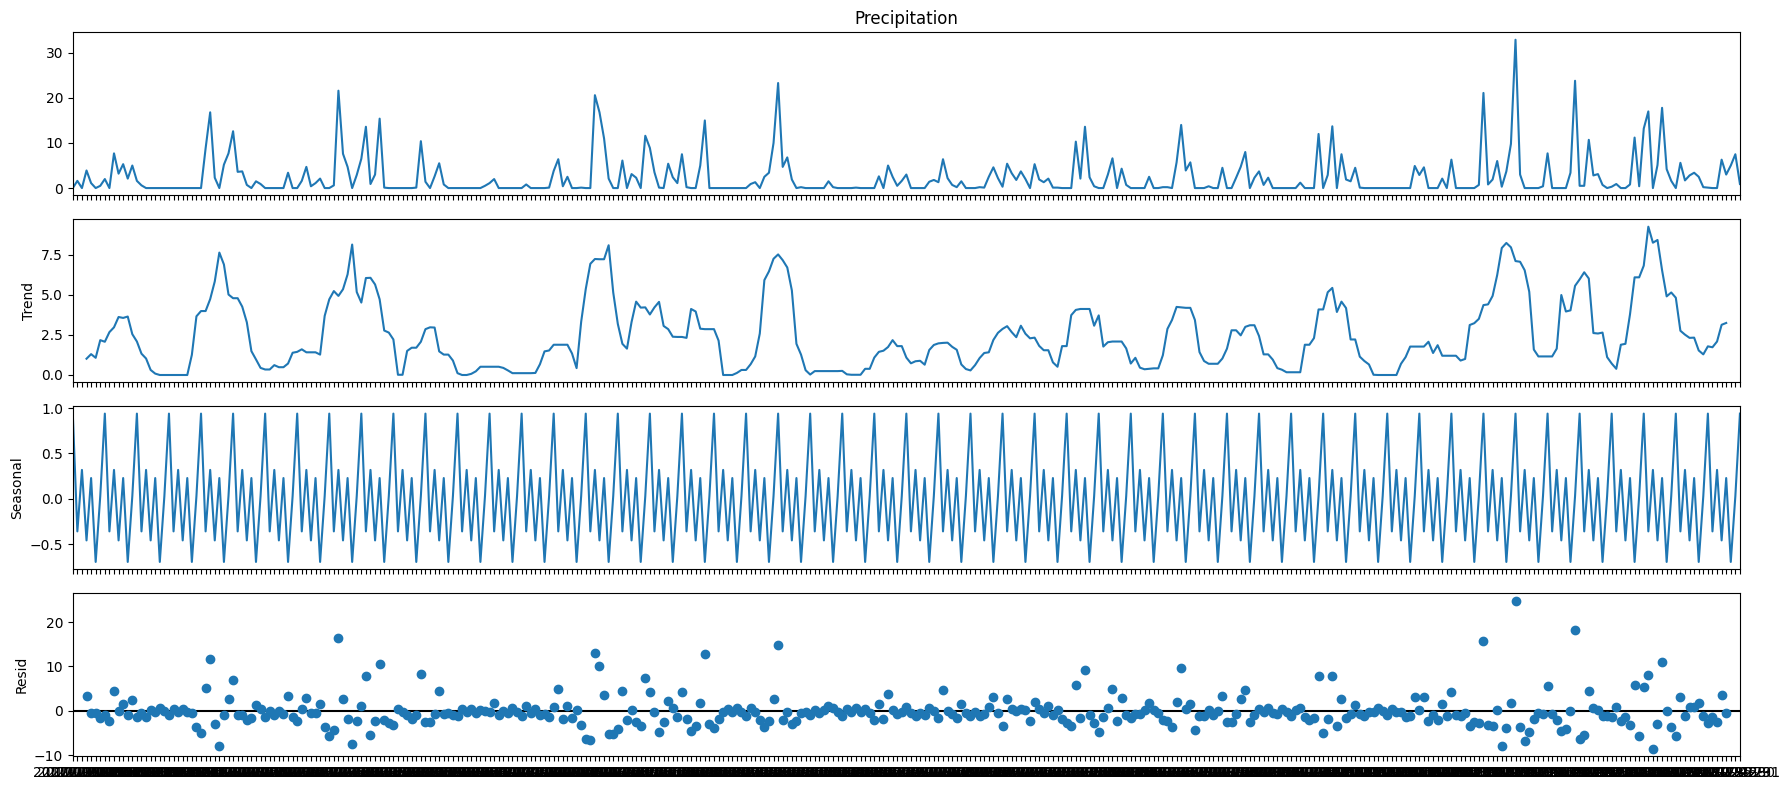

<Figure size 4000x1600 with 0 Axes>

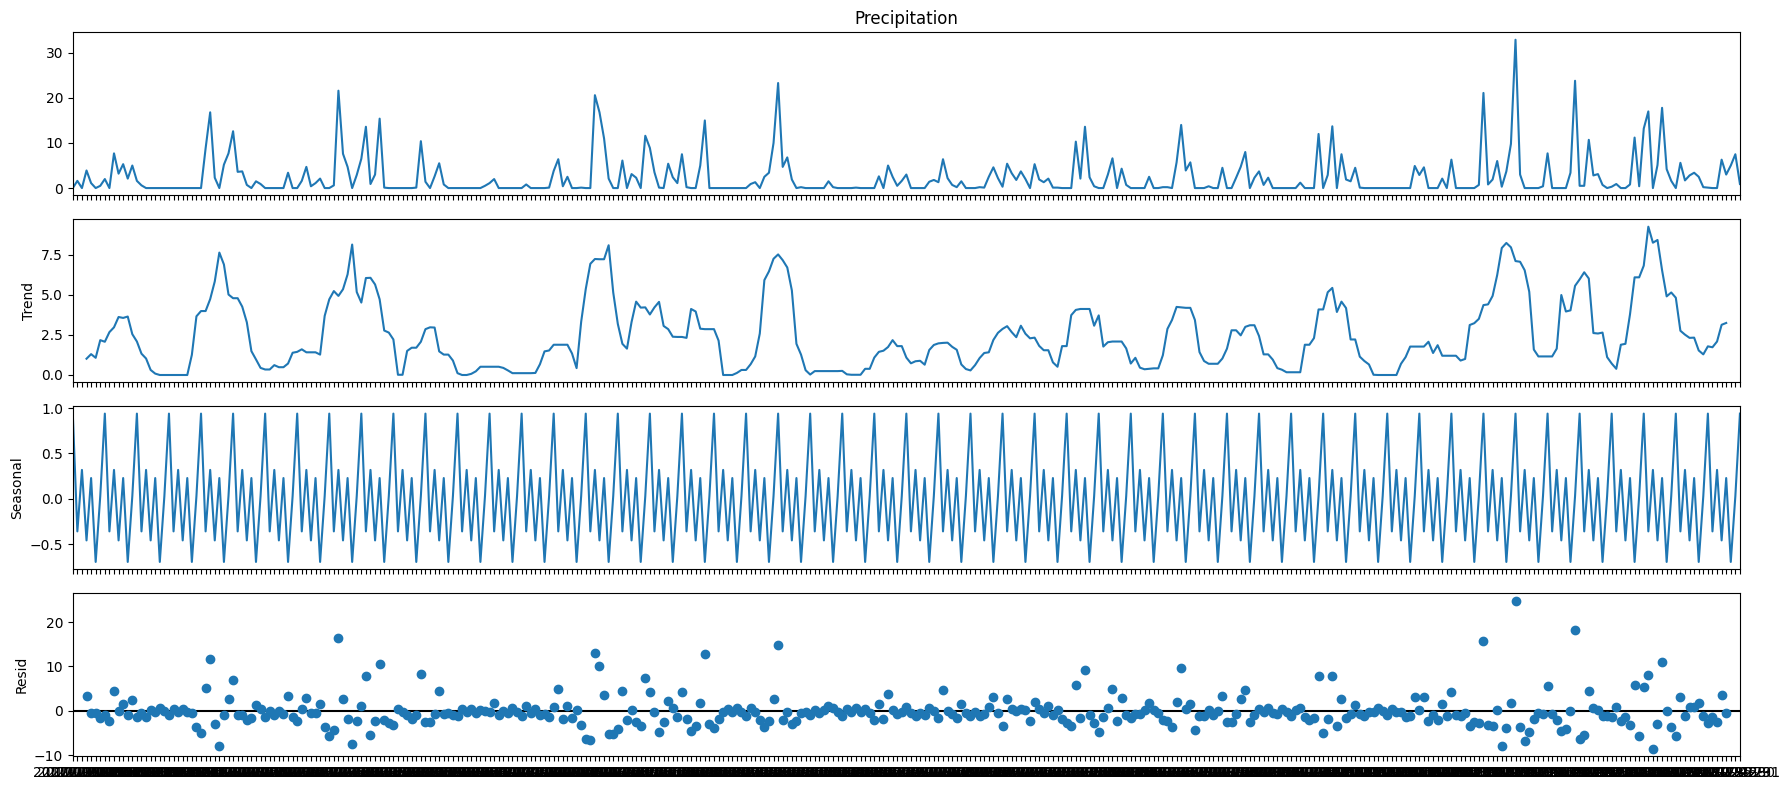

In [35]:
rcParams['figure.figsize'] = 18, 8
plt.figure(num=None, figsize=(50, 20), dpi=80, facecolor='w', edgecolor='k')
series = daily_data.Precipitation[:365]
result = seasonal_decompose(series, model='additive', period=7)
result.plot()

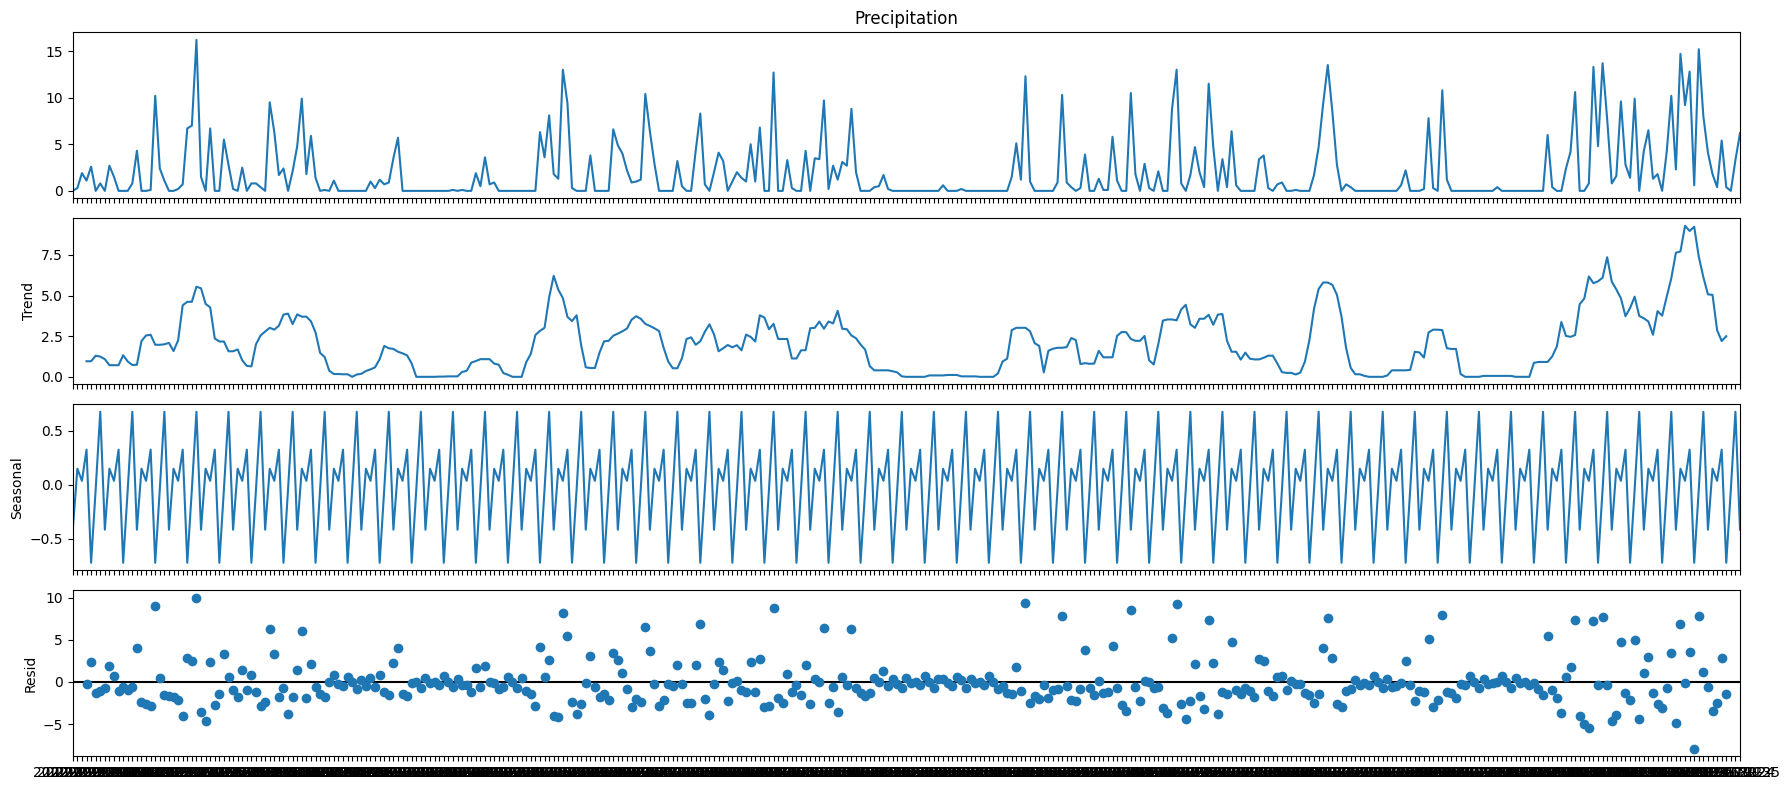

<Figure size 4000x1600 with 0 Axes>

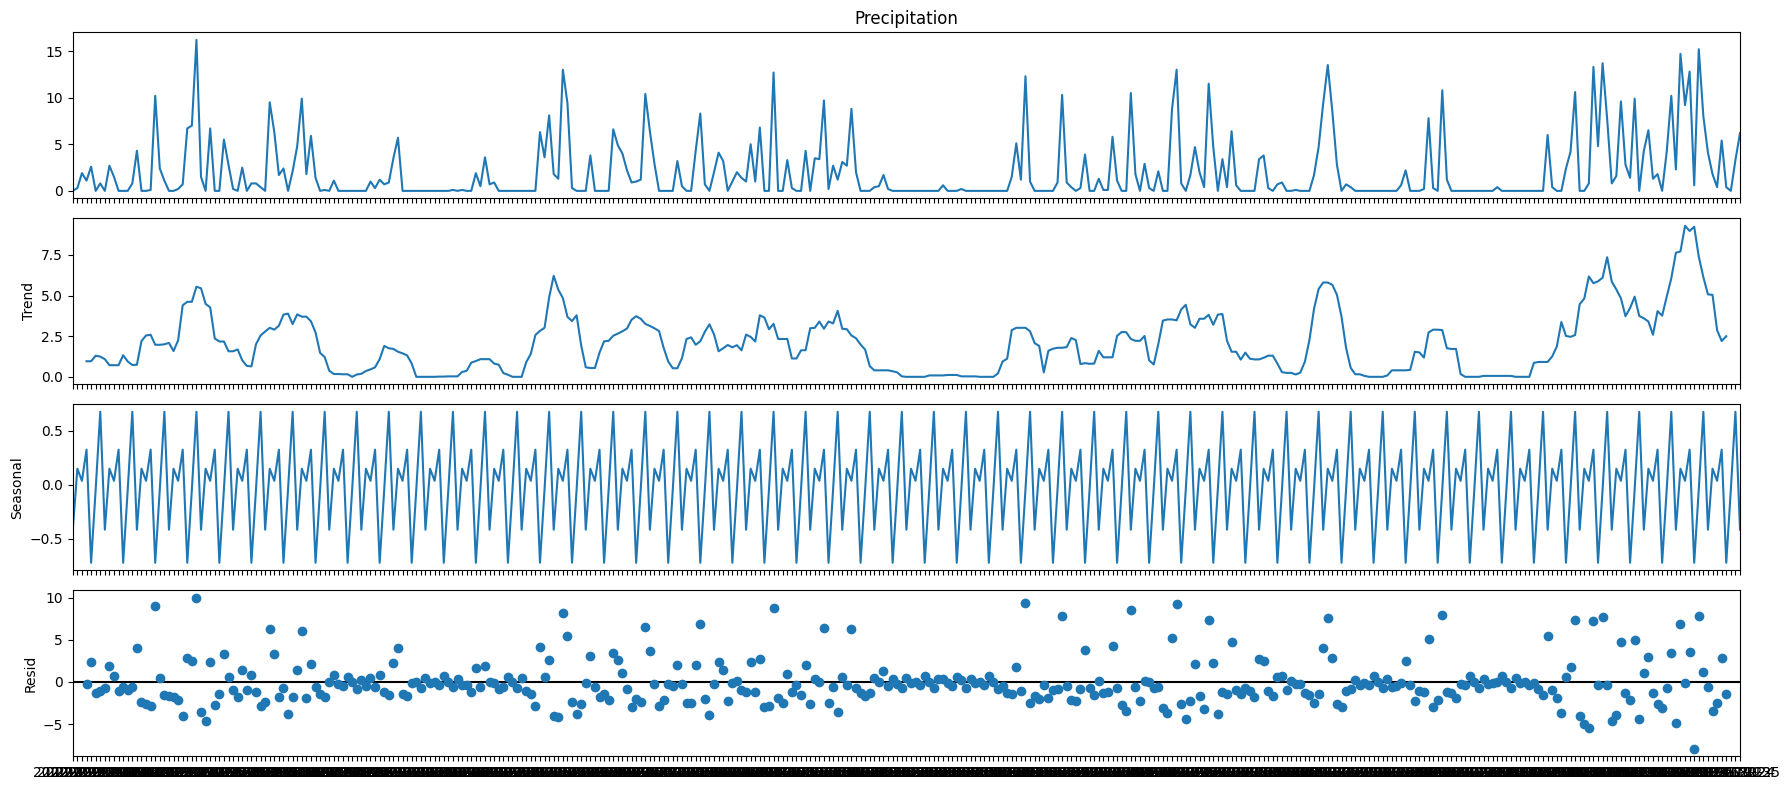

In [36]:
rcParams['figure.figsize'] = 18, 8
plt.figure(num=None, figsize=(50, 20), dpi=80, facecolor='w', edgecolor='k')
series = daily_data.Precipitation[-365:]
result = seasonal_decompose(series, model='additive', period=7)
result.plot()

Chúng tôi thấy một tính thời vụ hàng tuần khác (4 lần tăng đột biến giữa các tháng) nhưng hơi khác so với tính thời vụ ban đầu, đây là điều chúng ta nên luôn mong đợi từ các tập dữ liệu thực vì tính thời vụ của chúng sẽ không bao giờ hoàn hảo mà là sự kết hợp của nhiều bội số.

/media/binhnguyenduc/ubuntu_sofware/anaconda3/envs/newpython/lib/python3.10/site-packages/numpy/lib/polynomial.py:667: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
/media/binhnguyenduc/ubuntu_sofware/anaconda3/envs/newpython/lib/python3.10/site-packages/numpy/core/_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/tmp/ipykernel_46706/257637016.py:5: RankWarning: Polyfit may be poorly conditioned
  coef = np.polyfit(X, y, degree)


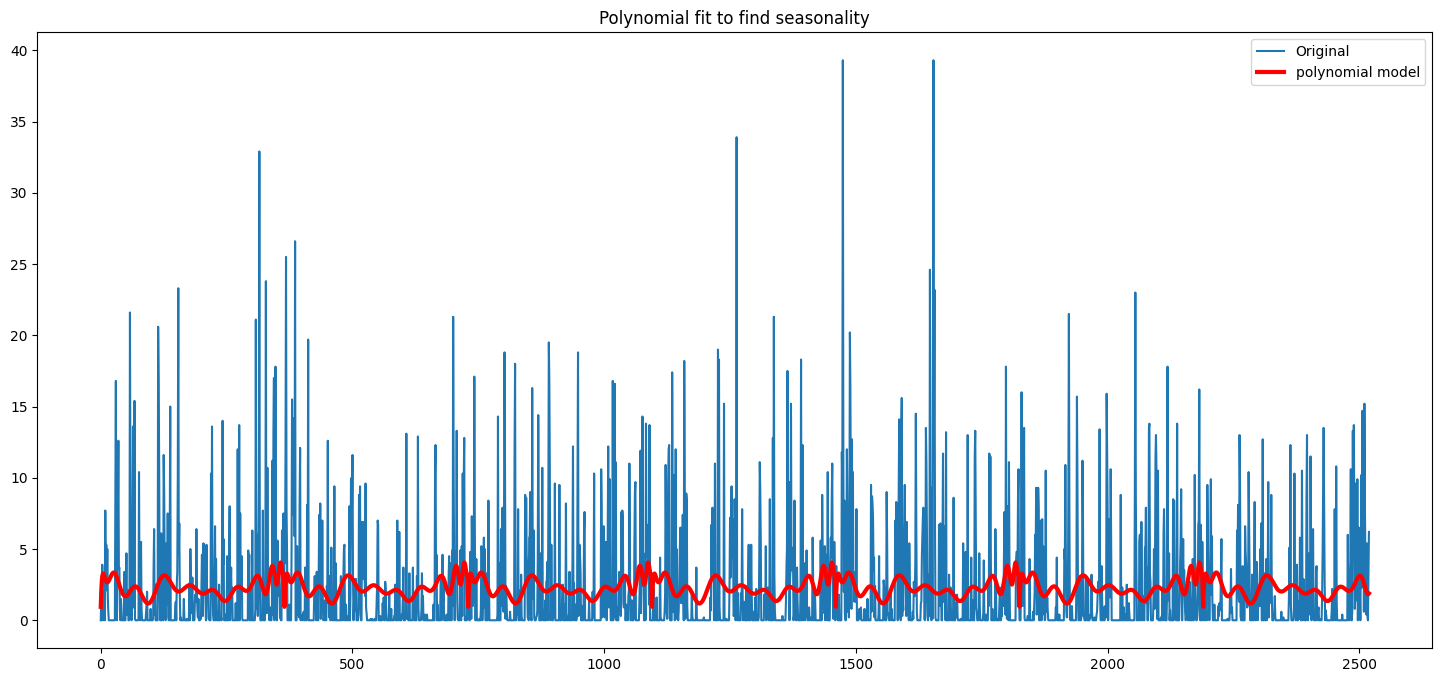

In [38]:
series = daily_data.Precipitation.values
X = [i % 365 for i in range(0, len(series))]
y = series
degree = 100
coef = np.polyfit(X, y, degree)
# create curve
curve = list()
for i in range(len(X)):
    value = coef[-1]
    for d in range(degree):
        value += X[i]**(degree-d) * coef[d]
    curve.append(value)
# plot curve over original data
plt.plot(series, label='Original')
plt.plot(curve, color='red', linewidth=3, label='polynomial model')
plt.legend()
plt.title("Polynomial fit to find seasonality")
plt.show()

Noise

Text(0.5, 1.0, 'Mean over time')

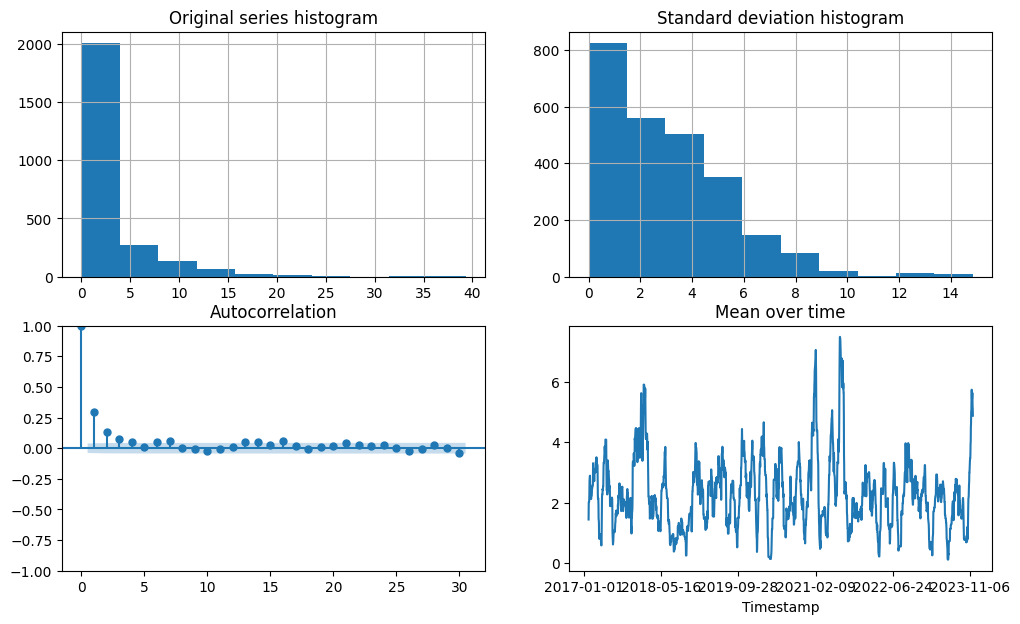

In [39]:
fig = plt.figure(figsize=(12, 7))
layout = (2, 2)
hist_ax = plt.subplot2grid(layout, (0, 0))
ac_ax = plt.subplot2grid(layout, (1, 0))
hist_std_ax = plt.subplot2grid(layout, (0, 1))
mean_ax = plt.subplot2grid(layout, (1, 1))

daily_data.Precipitation.hist(ax=hist_ax)
hist_ax.set_title("Original series histogram")

plot_acf(series, lags=30, ax=ac_ax)
ac_ax.set_title("Autocorrelation")

mm = daily_data.Precipitation.rolling(7).std()
mm.hist(ax=hist_std_ax)
hist_std_ax.set_title("Standard deviation histogram")

mm = daily_data.Precipitation.rolling(30).mean()
mm.plot(ax=mean_ax)
mean_ax.set_title("Mean over time")


Stationary

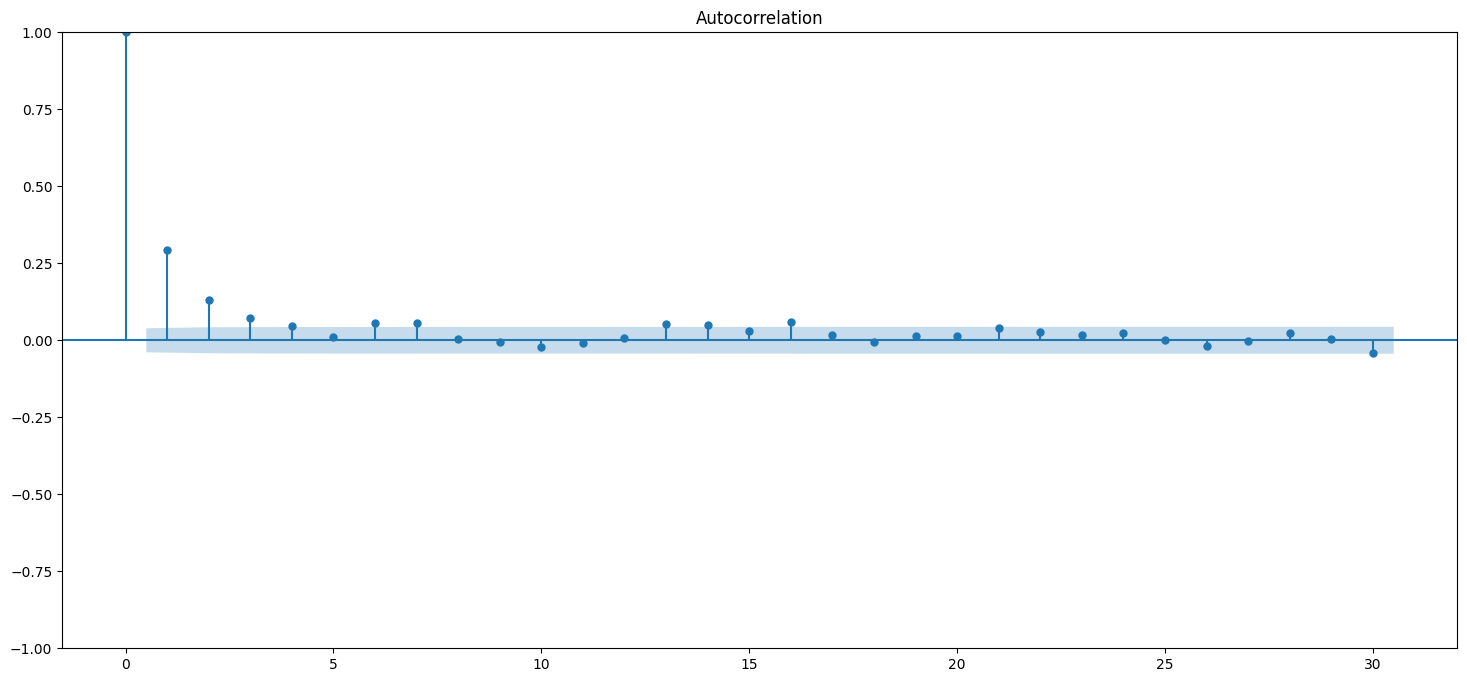

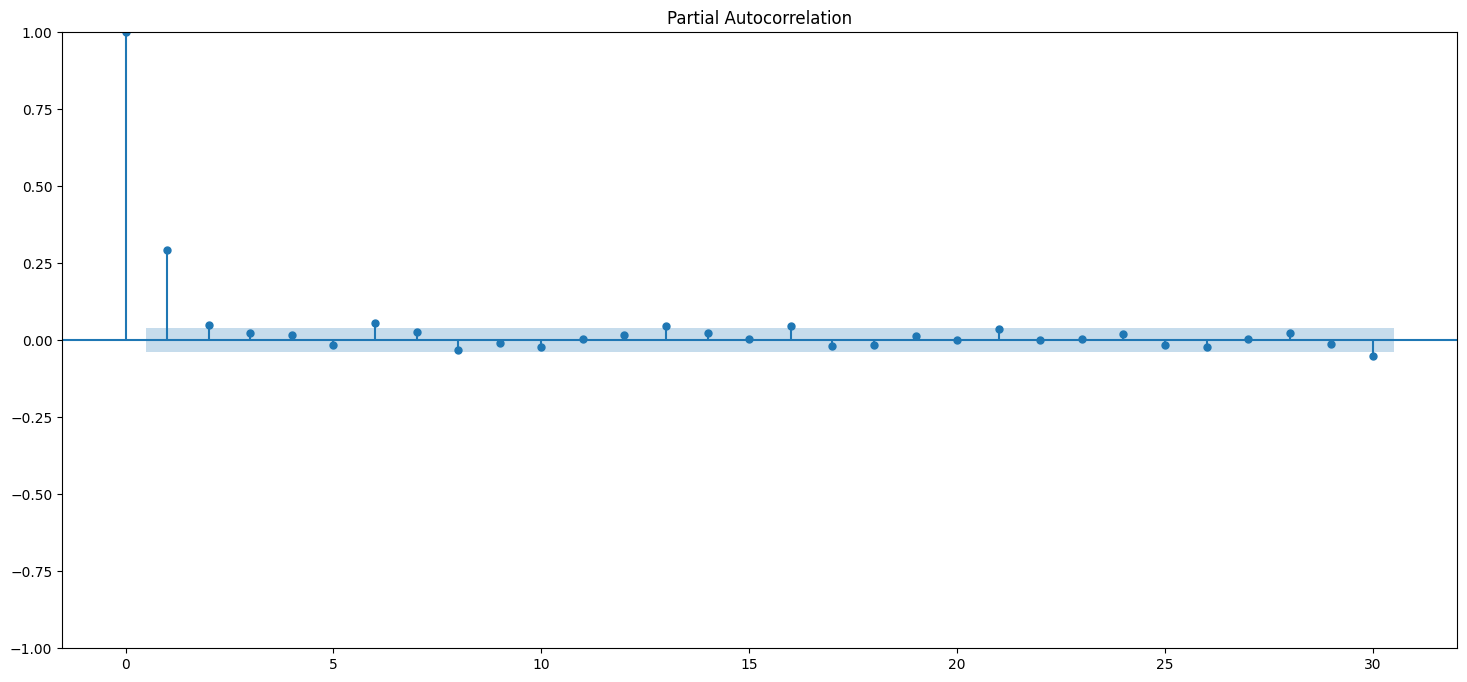

In [40]:
plot_acf(series, lags=30)
plot_pacf(series, lags=30)
plt.show()

In [42]:
X = daily_data.Precipitation.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -15.789841
p-value: 0.000000
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
